In [72]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC

import warnings
# suppress some MDAnalysis warnings about PSF files
#warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt


In [73]:
#scratchdir = '/home/jvilla/scratch'  # lavandula
#scratchdir = '/home/jordivilla/scratchdir'  # laptop
scratchdir = '/Users/jordivilla/scratch/md'  # mac


In [74]:
# some information
u = mda.Universe(scratchdir+'/dao_noNAG.parm7',scratchdir+'/heatdao_noNAG.nc')
print(u)
print(hasattr(u, 'trajectory'))
print(len(u.trajectory))
#print(u.residues)
#print(u.atoms)
print(u.select_atoms('resname TPQ').n_atoms)
#print(u.atoms[:45].names)

<Universe with 174032 atoms>
True
34
42


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/topology/TOPParser.py:306: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(msg)


visualize trajectory

In [75]:
import nglview as nv
view = nv.show_mdanalysis(u.select_atoms('resid 1-5'))
view

NGLWidget(max_frame=33)

In [76]:
tre = u.select_atoms('resid 1-5')
print(tre.names)
print(tre.center_of_mass())

['N' 'H1' 'H2' 'H3' 'CA' 'HA' 'CB' 'HB' 'CG1' 'HG11' 'HG12' 'HG13' 'CG2'
 'HG21' 'HG22' 'HG23' 'C' 'O' 'N' 'H' 'CA' 'HA' 'CB' 'HB2' 'HB3' 'CG'
 'HG2' 'HG3' 'CD' 'OE1' 'NE2' 'HE21' 'HE22' 'C' 'O' 'N' 'H' 'CA' 'HA' 'CB'
 'HB2' 'HB3' 'CG' 'ND1' 'CE1' 'HE1' 'NE2' 'HE2' 'CD2' 'HD2' 'C' 'O' 'N'
 'CD' 'HD2' 'HD3' 'CG' 'HG2' 'HG3' 'CB' 'HB2' 'HB3' 'CA' 'HA' 'C' 'O' 'N'
 'H' 'CA' 'HA' 'CB' 'HB2' 'HB3' 'CG' 'HG' 'CD1' 'HD11' 'HD12' 'HD13' 'CD2'
 'HD21' 'HD22' 'HD23' 'C' 'O']
[30.22129753 47.26550565 47.9546678 ]


In [77]:
for ts in u.trajectory[:20]:
    time = u.trajectory.time
    rgyr = u.atoms.radius_of_gyration()
    print("Frame: {:3d}, Time: {:5.1f} ps, Rgyr: {:.4f} A".format(ts.frame, time, rgyr))

Frame:   0, Time:   0.2 ps, Rgyr: 57.1433 A
Frame:   1, Time:   0.4 ps, Rgyr: 57.1218 A
Frame:   2, Time:   0.6 ps, Rgyr: 57.0286 A
Frame:   3, Time:   0.8 ps, Rgyr: 56.8986 A
Frame:   4, Time:   1.0 ps, Rgyr: 56.7562 A
Frame:   5, Time:   1.2 ps, Rgyr: 56.6136 A
Frame:   6, Time:   1.4 ps, Rgyr: 56.4764 A
Frame:   7, Time:   1.6 ps, Rgyr: 56.3471 A
Frame:   8, Time:   1.8 ps, Rgyr: 56.2235 A
Frame:   9, Time:   2.0 ps, Rgyr: 56.1064 A
Frame:  10, Time:   2.2 ps, Rgyr: 55.9978 A
Frame:  11, Time:   2.4 ps, Rgyr: 55.8981 A
Frame:  12, Time:   2.6 ps, Rgyr: 55.8070 A
Frame:  13, Time:   2.8 ps, Rgyr: 55.7265 A
Frame:  14, Time:   3.0 ps, Rgyr: 55.6558 A
Frame:  15, Time:   3.2 ps, Rgyr: 55.5940 A
Frame:  16, Time:   3.4 ps, Rgyr: 55.5410 A
Frame:  17, Time:   3.6 ps, Rgyr: 55.4963 A
Frame:  18, Time:   3.8 ps, Rgyr: 55.4571 A
Frame:  19, Time:   4.0 ps, Rgyr: 55.4213 A


collect data in a list first

In [78]:
rgyr = []
time = []

for ts in u.trajectory:
    time.append(u.trajectory.time)
    rgyr.append(tre.radius_of_gyration())

now transform into a pandas dataframe and plot

In [79]:
import pandas as pd
rgyr_df = pd.DataFrame(rgyr, columns=['Radius of gyration (A)'], index=time)
rgyr_df.index.name = 'Time (ps)'

rgyr_df.head()

,Radius of gyration (A)
Time (ps),
0.2,5.052170
0.4,5.070926
0.6,5.030868
0.8,5.028620
1.0,5.021987


<Axes: title={'center': 'Radius of gyration'}, xlabel='Time (ps)'>

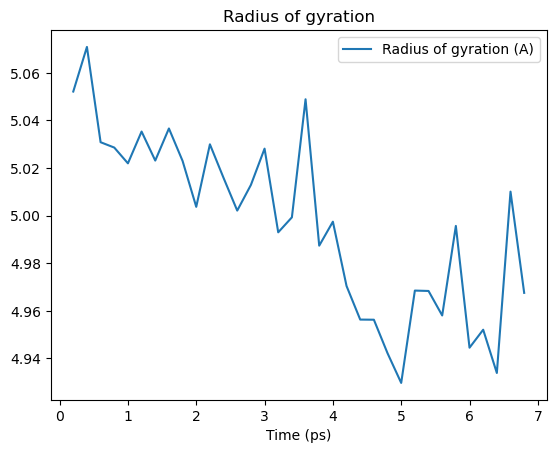

In [80]:
%matplotlib inline

rgyr_df.plot(title='Radius of gyration')

test the change in RMSD from the first to the last snapshot in the trajectory

In [81]:
from MDAnalysis.analysis import rms


u.trajectory[0] # first frame
first = tre.positions


u.trajectory[-1] #last frame
last = tre.positions

print(first,last)

rms.rmsd(first, last)

[[32.594944 42.858704 43.52061 ]
 [33.36108  43.246788 42.989075]
 [32.96779  42.11257  44.090153]
 [31.902569 42.459106 42.903324]
 [31.97585  43.875492 44.392475]
 [32.718906 44.168816 45.13405 ]
 [31.593014 45.16158  43.625233]
 [31.147348 45.8342   44.35808 ]
 [32.83089  45.88162  43.059082]
 [32.539738 46.858707 42.654186]
 [33.5766   46.07142  43.84094 ]
 [33.30943  45.319057 42.24795 ]
 [30.581781 45.008934 42.464363]
 [30.360374 45.98765  42.021076]
 [30.96478  44.36753  41.66104 ]
 [29.632221 44.591614 42.821568]
 [30.78211  43.281445 45.157246]
 [30.10192  42.40912  44.639194]
 [30.52427  43.746986 46.382504]
 [31.186142 44.415585 46.749928]
 [29.30553  43.507915 47.18292 ]
 [28.516315 43.147182 46.52329 ]
 [29.525215 42.427906 48.26958 ]
 [30.282904 42.769268 48.974903]
 [28.58819  42.320396 48.81596 ]
 [29.925697 41.037796 47.735542]
 [29.218685 40.735664 46.962914]
 [30.915789 41.098408 47.28372 ]
 [29.933168 39.967525 48.83591 ]
 [28.913935 39.426044 49.21621 ]
 [31.07646

1.2170993883256245

now run a complete RMSD plot

The results are stored in the `.rmsd` attribute. This is an array with the shape `(n_frames, 2 + n_selections)`.

In [82]:
u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone')
rmsd_analysis.run()
rmsd_analysis.results.rmsd.shape
print(rmsd_analysis.rmsd.shape)

rmsd_df = pd.DataFrame(rmsd_analysis.results.rmsd,
                       columns=['Frame', 'Time (ns)', 'Backbone'])
rmsd_df.head()



(34, 3)


/Users/jordivilla/miniconda3/lib/python3.12/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


,Frame,Time (ns),Backbone
0,0.0,0.2,0.000002
1,1.0,0.4,0.154646
2,2.0,0.6,0.287097
3,3.0,0.8,0.391838
4,4.0,1.0,0.470551


Text(0, 0.5, 'RMSD ($\\AA$)')

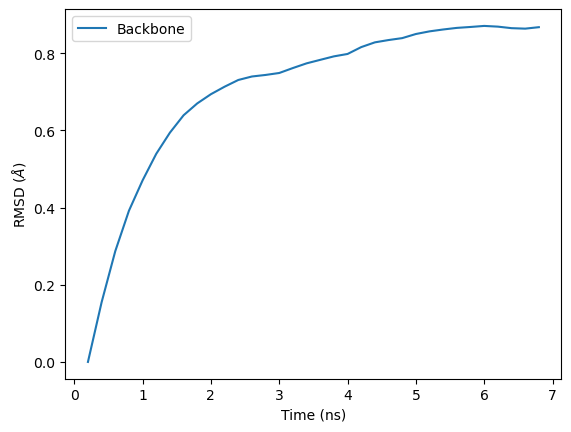

In [83]:
ax = rmsd_df.plot(x='Time (ns)', y=['Backbone'],kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')